In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
df = pd.read_csv('zoo.csv')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [2]:
classes = ['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']
X_train, X_test, y_train, y_test = train_test_split(df.drop('animal_name', axis=1).drop('class_type', axis=1), df['class_type'], train_size=0.65)
X_train.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
38,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
24,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0
54,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0
51,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0
25,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0


In [3]:
y_train.head()

38    4
24    6
54    1
51    6
25    5
Name: class_type, dtype: int64

In [4]:
model = DecisionTreeClassifier()

In [5]:
model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [6]:
y_pred = model.predict(X_test)
y_pred

array([2, 6, 1, 7, 4, 2, 6, 5, 1, 4, 1, 4, 1, 6, 4, 4, 3, 2, 5, 1, 6, 1,
       4, 2, 3, 1, 1, 2, 1, 7, 1, 1, 2, 1, 1, 2])

In [7]:
print(confusion_matrix(y_test, y_pred))

[[13  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  2  2]]


In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7
           3       0.50      0.50      0.50         2
           4       1.00      1.00      1.00         6
           5       0.50      0.50      0.50         2
           6       0.50      1.00      0.67         2
           7       1.00      0.50      0.67         4

    accuracy                           0.89        36
   macro avg       0.79      0.79      0.76        36
weighted avg       0.92      0.89      0.89        36



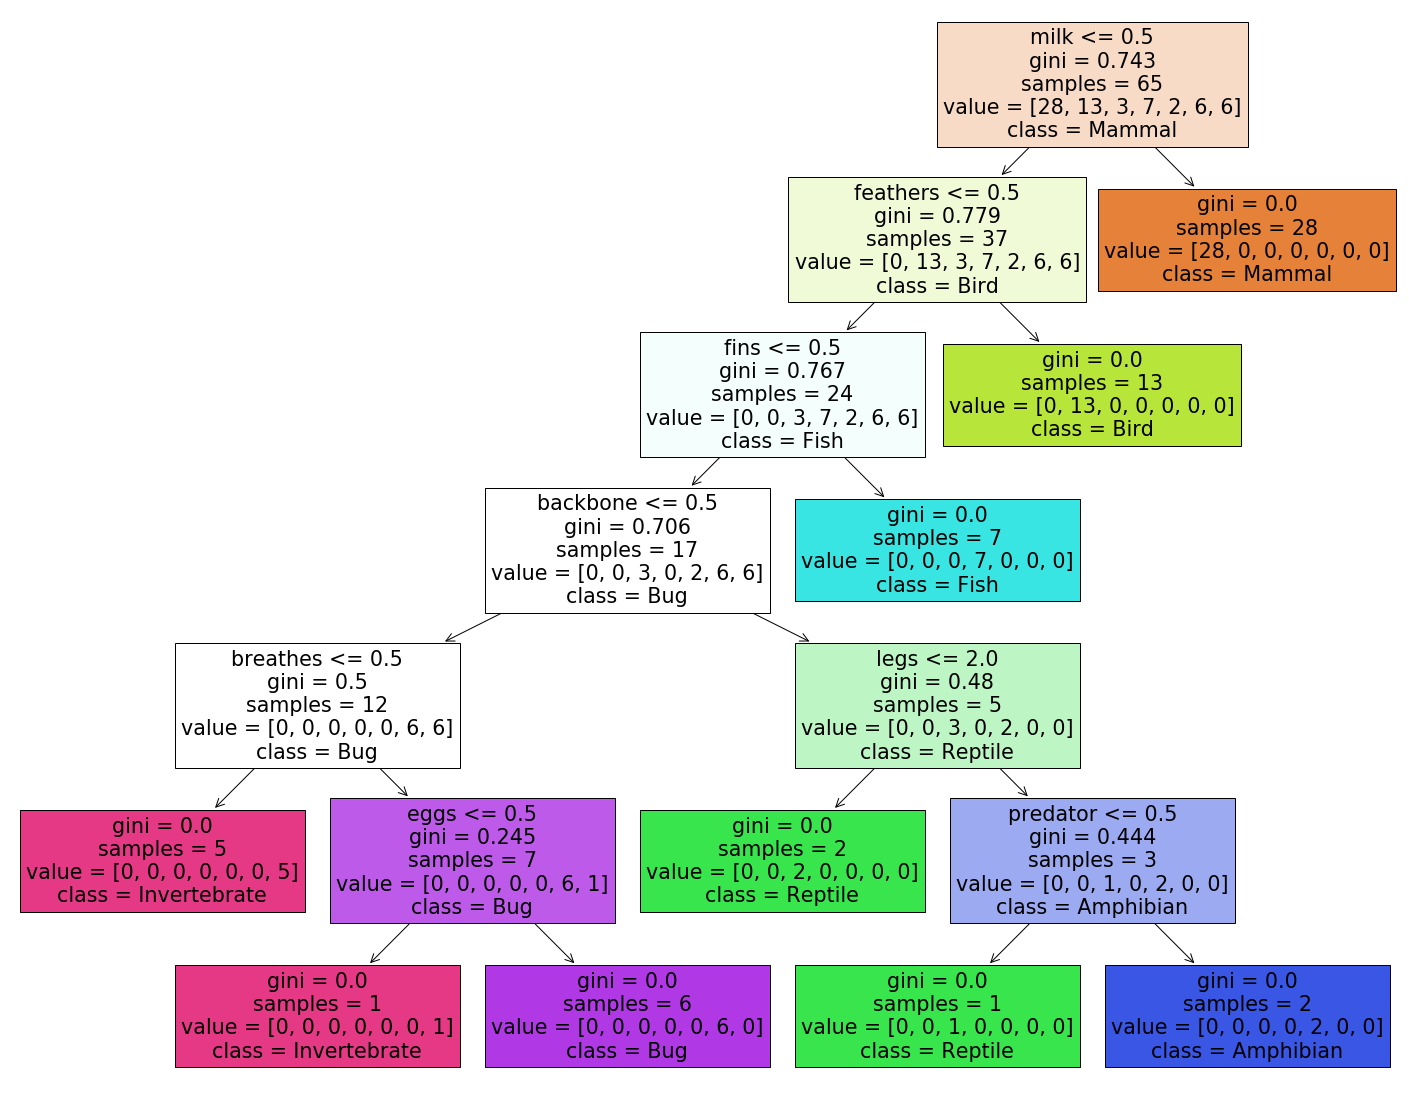

In [12]:
fig = plt.figure(figsize = (25,20))
_ = plot_tree(model,feature_names = X_train.columns,
             class_names=classes,
             filled = True)